# EQUITY CLIQUET OPTION

Valuation and Risk of Equity Cliquet Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.200 - This build:  14 Jul 2021 at 16:00 #
# **** NEW PEP8 COMPLIANT VERSION -- PLEASE UPDATE YOUR CODE  **** #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



C:\Users\Dominic\anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 7004. The TBB threading layer is disabled.
  warnings.warn(problem)


# Cliquet Option

I create a cliquet option

In [3]:
start_date = Date(1,1, 2020)

In [4]:
expiry_date = Date(1, 1, 2025)

In [5]:
option_typeCall = OptionTypes.EUROPEAN_CALL

In [6]:
frequencyType = FrequencyTypes.ANNUAL

In [7]:
cliquetCall = EquityCliquetOption(start_date, expiry_date, option_typeCall, frequencyType)

In [8]:
print(cliquetCall)

OBJECT TYPE: EquityCliquetOption
START DATE: 01-JAN-2020
FINAL EXPIRY DATE: 01-JAN-2025
OPTION TYPE: OptionTypes.EUROPEAN_CALL
FREQUENCY TYPE: FrequencyTypes.ANNUAL
DAY COUNT TYPE: DayCountTypes.THIRTY_E_360
CALENDAR TYPE: CalendarTypes.WEEKEND
BUS DAY ADJUST TYPE: BusDayAdjustTypes.FOLLOWING
DATE GEN RULE TYPE: DateGenRuleTypes.BACKWARD


## Valuation

In [9]:
valuation_date = Date(1, 1, 2020)

In [10]:
interest_rate = 0.10

In [11]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [12]:
dividend_yield = 0.0

In [13]:
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

In [14]:
volatility = 0.10

In [15]:
model = BlackScholes(volatility)

In [16]:
stock_prices = np.linspace(50, 150, 20)

In [17]:
values = []

for stock_price in stock_prices:
    stock_min_max = stock_price
    v = cliquetCall.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
    values.append(v)

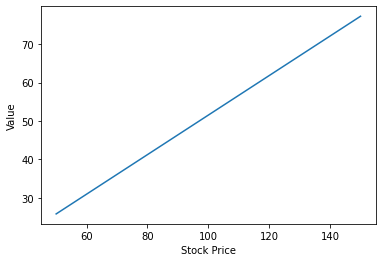

In [18]:
plt.plot(stock_prices, values)
plt.xlabel("Stock Price")
plt.ylabel("Value");

In [19]:
cliquetCall.print_flows()

01-JAN-2021 0.9048374180359595 0.1
03-JAN-2022 0.818282256374285 0.1
02-JAN-2023 0.7406152845863752 0.1
01-JAN-2024 0.6703200460356393 0.1
01-JAN-2025 0.6065306597126334 0.1


Copyright (c) 2020 Dominic O'Kane